## Importing Libraries

In [123]:
import pandas as pd;
from sklearn.datasets import load_boston;
import seaborn as sns;
from sklearn.preprocessing import StandardScaler;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LinearRegression;
from sklearn.linear_model import Lasso;
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score;
from sklearn.preprocessing import PolynomialFeatures

## Reading the Boston Housing Prices using the sklearn function

In [37]:
boston_dataset = load_boston()
df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### Since the boston dataset is pre-prepared in that it is already divided into features and targets, the MEDV column cannot be preloaded directly. Hence, we can manually add the MEDV column by calling the target

In [38]:
df['MEDV'] = boston_dataset.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [39]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [40]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Using the describe function we can see a lot of things here. Most importantly that there are a couple of outliers in the data. For instance if you compare the max with the mean of each column then you will see a big difference

## Univariate Analysis

/Users/adarshraghav/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

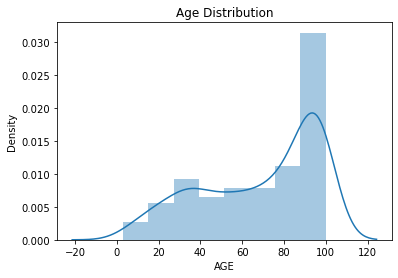

In [41]:
sns.distplot(df['AGE'])
plt.title("Age Distribution")

#### As we can see in the distribution above  most owners are above the age of 70. Although this doesnt give us much idea we can try and plot something against it. As you can see below I'm plot the median house value against age to find a relation

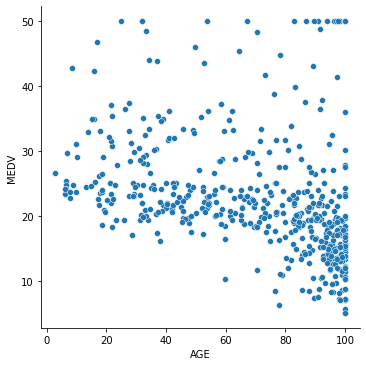

In [42]:
sns.relplot(data = df, x="AGE", y="MEDV")

#### The general trend we can see here is that Median Value of the house starts to decrease as Age increases

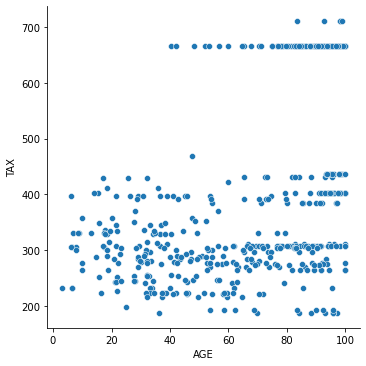

In [43]:
sns.relplot(data = df, x="AGE", y="TAX")

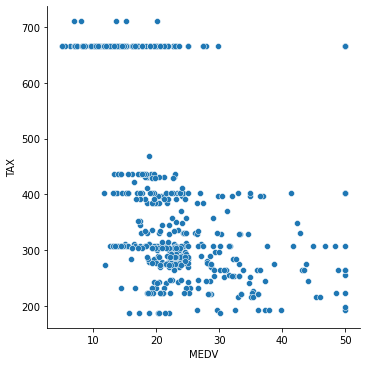

In [44]:
sns.relplot(data = df, x="MEDV", y="TAX")

#### As we can see here when median house value is low, Tax is higher. This is very odd as it cannot be possible unless some other factors are into play. We may have to do multivariate analysis to find the correlation in other variables

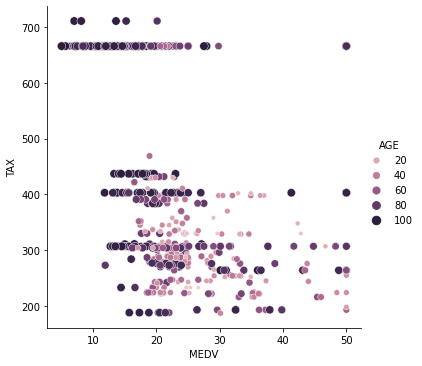

In [45]:
sns.relplot(x='MEDV', y='TAX', data=df, hue='AGE', size='AGE')

#### Another thing to be noted here is that most of the highest tax payers are people aged above 80 with some of the lowest Median Values.

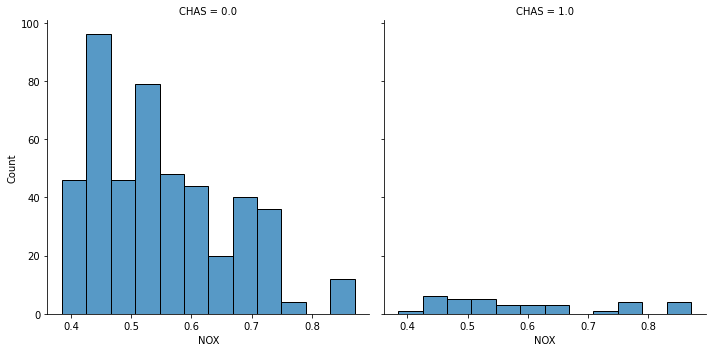

In [46]:
sns.displot(df, x="NOX", col="CHAS")

#### Since CHAS was a binary data switching between 0 and 1, I tried to use that too. Here we can see that when CHAS=0 the NOX value is higher as compared to when CHAS=0.

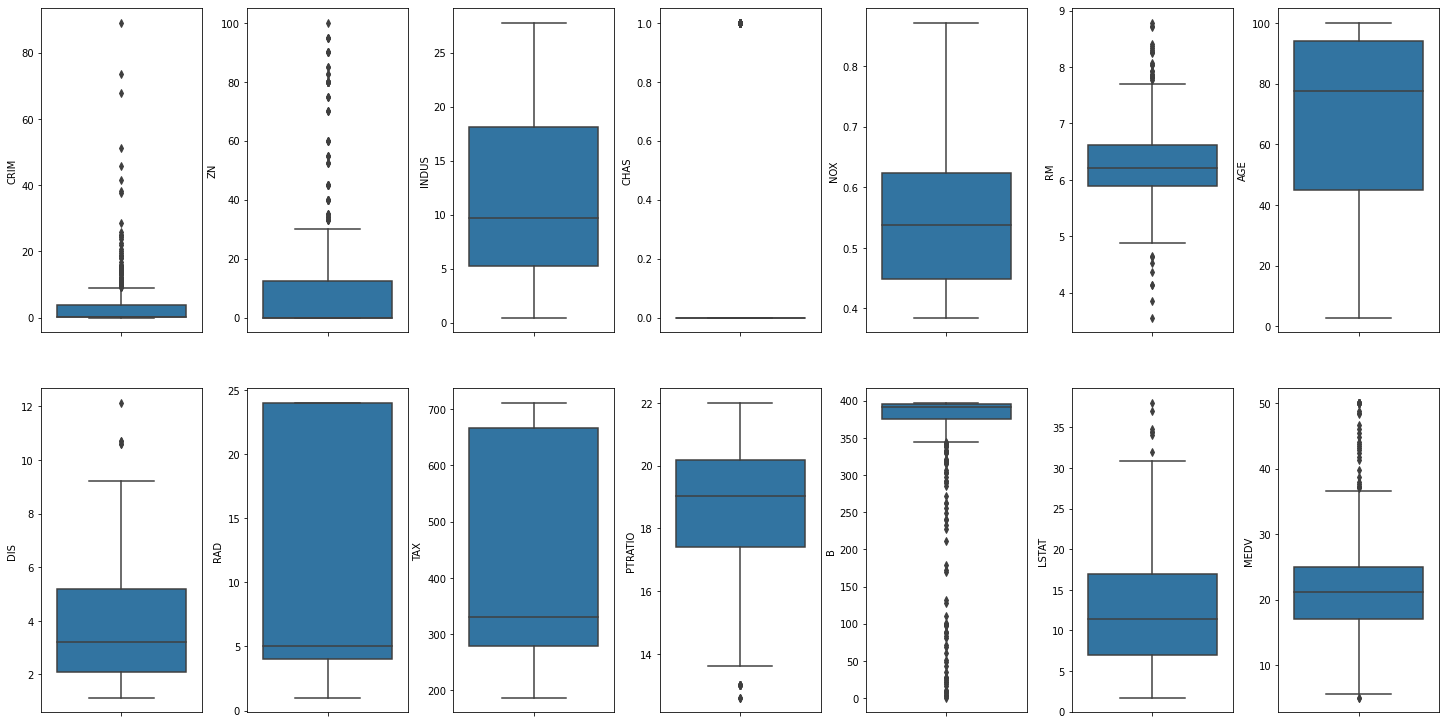

In [47]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#### As we can see my hypothesis was correct that many attributes here have outliers

## Multi-variate Analysis

<AxesSubplot:>

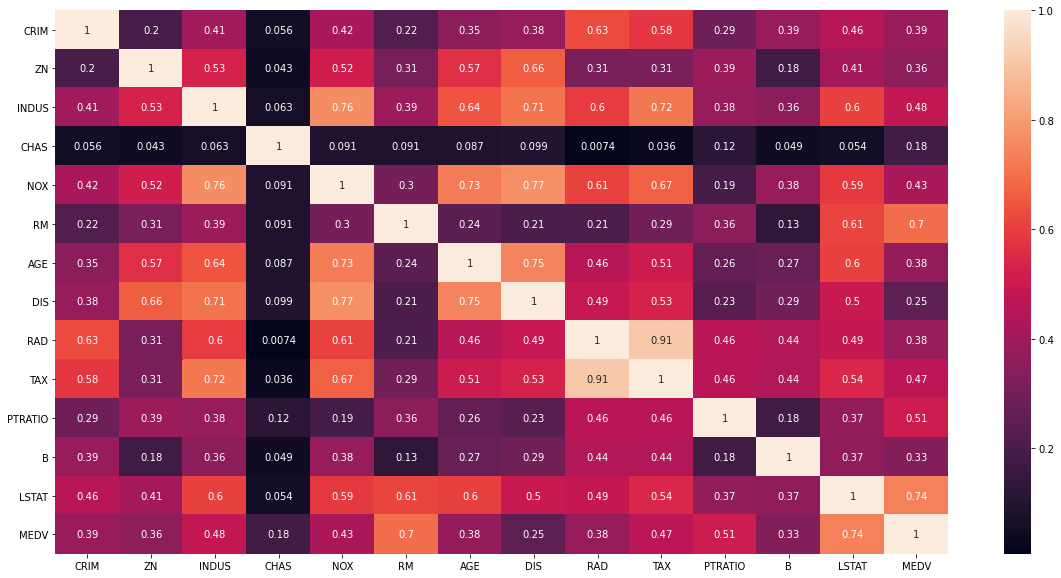

In [48]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

#### Here RAD and TAX attributes are highly correlated which mean we have to take out either of the one, as keeping both will not help, only giving rise to inaccuracy

In [49]:
df=df.drop(['RAD'], axis = 1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48,22.0


#### Now we will scale down the feature values using the standard scaled

In [54]:
df2 = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [61]:
scaler = StandardScaler().fit(df2)
df2 = scaler.transform(df2)
df2

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

## Linear Regression

In [65]:
X = df2
y = boston_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [67]:
reg=LinearRegression()
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [76]:
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)
print("RMSE after prediction on training data is: {}".format(rmse_train))
print("RMSE after prediction on testing data is: {}".format(rmse_test))

RMSE after prediction on training data is: 22.545481487421426
RMSE after prediction on testing data is: 21.517444231177272


In [78]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("R2 Score after prediction on training data is: {}, or in percentage {}%".format(r2_train, r2_train*100))
print("R2 Score after prediction on testing data is: {}, or in percentage {}%".format(r2_test, r2_test*100))

R2 Score after prediction on training data is: 0.7434997532004697, or in percentage 74.34997532004697%
R2 Score after prediction on testing data is: 0.7112260057484924, or in percentage 71.12260057484924%


## Polynomial Regression

In [98]:
from sklearn.preprocessing import PolynomialFeatures
def poly_reg(X,y,X2, deg):
    poly_reg = PolynomialFeatures(degree=deg)
    X_poly = poly_reg.fit_transform(X)
    pol_reg = LinearRegression()
    pol_reg.fit(X_poly, y)
    return pol_reg.predict(poly_reg.fit_transform(X2))

In [116]:
deg = 1
Y_Pred_poly_test = poly_reg(X_train, y_train, X_test, deg)
Y_Pred_poly_train = poly_reg(X_train, y_train, X_train, deg)

In [117]:
rmse_poly_train = mean_squared_error(y_train, Y_Pred_poly_train)
rmse_poly_test = mean_squared_error(y_test, Y_Pred_poly_test)
r2_poly_train = r2_score(y_train, Y_Pred_poly_train)
r2_poly_test = r2_score(y_test, Y_Pred_poly_test)
print("--------------- For Polynomial with Degree = {} ---------------".format(deg))
print("RMSE after prediction on testing data is: {}".format(rmse_poly_test))
print("RMSE after prediction on training data is: {}".format(rmse_poly_train))
print("R2Score after prediction on testing data is: {}".format(r2_poly_test))
print("R2Score after prediction on training data is: {}".format(r2_poly_train))

--------------- For Polynomial with Degree = 1 ---------------
RMSE after prediction on testing data is: 21.517444231177272
RMSE after prediction on training data is: 22.545481487421423
R2Score after prediction on testing data is: 0.7112260057484924
R2Score after prediction on training data is: 0.7434997532004697


In [118]:
deg = 3
Y_Pred_poly_test = poly_reg(X_train, y_train, X_test, deg)
Y_Pred_poly_train = poly_reg(X_train, y_train, X_train, deg)

In [119]:
rmse_poly_train = mean_squared_error(y_train, Y_Pred_poly_train)
rmse_poly_test = mean_squared_error(y_test, Y_Pred_poly_test)
r2_poly_train = r2_score(y_train, Y_Pred_poly_train)
r2_poly_test = r2_score(y_test, Y_Pred_poly_test)
print("--------------- For Polynomial with Degree = {} ---------------".format(deg))
print("RMSE after prediction on testing data is: {}".format(rmse_poly_test))
print("RMSE after prediction on training data is: {}".format(rmse_poly_train))
print("R2Score after prediction on testing data is: {}".format(r2_poly_test))
print("R2Score after prediction on training data is: {}".format(r2_poly_train))

--------------- For Polynomial with Degree = 3 ---------------
RMSE after prediction on testing data is: 5915.555892602267
RMSE after prediction on training data is: 1.886538838040164e-24
R2Score after prediction on testing data is: -78.38947976217601
R2Score after prediction on training data is: 1.0


In [120]:
deg = 6
Y_Pred_poly_test = poly_reg(X_train, y_train, X_test, deg)
Y_Pred_poly_train = poly_reg(X_train, y_train, X_train, deg)

In [121]:
rmse_poly_train = mean_squared_error(y_train, Y_Pred_poly_train)
rmse_poly_test = mean_squared_error(y_test, Y_Pred_poly_test)
r2_poly_train = r2_score(y_train, Y_Pred_poly_train)
r2_poly_test = r2_score(y_test, Y_Pred_poly_test)
print("--------------- For Polynomial with Degree = {} ---------------".format(deg))
print("RMSE after prediction on testing data is: {}".format(rmse_poly_test))
print("RMSE after prediction on training data is: {}".format(rmse_poly_train))
print("R2Score after prediction on testing data is: {}".format(r2_poly_test))
print("R2Score after prediction on training data is: {}".format(r2_poly_train))

--------------- For Polynomial with Degree = 6 ---------------
RMSE after prediction on testing data is: 29483.688159379035
RMSE after prediction on training data is: 5.417585903688617e-24
R2Score after prediction on testing data is: -394.6846502575523
R2Score after prediction on training data is: 1.0


### For the 3 degrees we tested in this model (1, 3, 6) we got different results for the RMSE and R2 scores. These scores can now help us understand how the models performed:
### Polynomial Model with Degree=1
### ------------------------------
### This was a good generalisation as scores/errors of both training and testing data where equal.
###
### Polynomial Model with Degree=3 and 6
### ------------------------------
### Both these model were highly overfitted with them having great results on training data but very bad results on testing data.

## Regularization

In [124]:
def poly_reg(X,y,X2, deg):
    poly_reg = PolynomialFeatures(degree=deg)
    X_poly = poly_reg.fit_transform(X)
    clf = Lasso(alpha=0.01, max_iter=10000)
    clf.fit(X_poly, y)
    return clf.predict(poly_reg.fit_transform(X2))

In [125]:
deg = 1
Y_Pred_poly_test = poly_reg(X_train, y_train, X_test, deg)
Y_Pred_poly_train = poly_reg(X_train, y_train, X_train, deg)

In [126]:
rmse_poly_train = mean_squared_error(y_train, Y_Pred_poly_train)
rmse_poly_test = mean_squared_error(y_test, Y_Pred_poly_test)
r2_poly_train = r2_score(y_train, Y_Pred_poly_train)
r2_poly_test = r2_score(y_test, Y_Pred_poly_test)
print("--------------- For Polynomial with Degree = {} ---------------".format(deg))
print("RMSE after prediction on testing data is: {}".format(rmse_poly_test))
print("RMSE after prediction on training data is: {}".format(rmse_poly_train))
print("R2Score after prediction on testing data is: {}".format(r2_poly_test))
print("R2Score after prediction on training data is: {}".format(r2_poly_train))

--------------- For Polynomial with Degree = 1 ---------------
RMSE after prediction on testing data is: 21.566599576767814
RMSE after prediction on training data is: 22.55283091286377
R2Score after prediction on testing data is: 0.7105663184114421
R2Score after prediction on training data is: 0.7434161386881406


In [127]:
deg = 3
Y_Pred_poly_test = poly_reg(X_train, y_train, X_test, deg)
Y_Pred_poly_train = poly_reg(X_train, y_train, X_train, deg)

/Users/adarshraghav/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.757878123142632, tolerance: 3.111537141242938
  model = cd_fast.enet_coordinate_descent(
/Users/adarshraghav/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.757878123142632, tolerance: 3.111537141242938
  model = cd_fast.enet_coordinate_descent(


In [128]:
rmse_poly_train = mean_squared_error(y_train, Y_Pred_poly_train)
rmse_poly_test = mean_squared_error(y_test, Y_Pred_poly_test)
r2_poly_train = r2_score(y_train, Y_Pred_poly_train)
r2_poly_test = r2_score(y_test, Y_Pred_poly_test)
print("--------------- For Polynomial with Degree = {} ---------------".format(deg))
print("RMSE after prediction on testing data is: {}".format(rmse_poly_test))
print("RMSE after prediction on training data is: {}".format(rmse_poly_train))
print("R2Score after prediction on testing data is: {}".format(r2_poly_test))
print("R2Score after prediction on training data is: {}".format(r2_poly_train))

--------------- For Polynomial with Degree = 3 ---------------
RMSE after prediction on testing data is: 20.577803871013035
RMSE after prediction on training data is: 2.1727358494497278
R2Score after prediction on testing data is: 0.7238364113826055
R2Score after prediction on training data is: 0.9752807549519412


In [129]:
deg = 6
Y_Pred_poly_test = poly_reg(X_train, y_train, X_test, deg)
Y_Pred_poly_train = poly_reg(X_train, y_train, X_train, deg)

/Users/adarshraghav/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.6185033993451, tolerance: 3.111537141242938
  model = cd_fast.enet_coordinate_descent(
/Users/adarshraghav/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.6185033993451, tolerance: 3.111537141242938
  model = cd_fast.enet_coordinate_descent(


In [130]:
rmse_poly_train = mean_squared_error(y_train, Y_Pred_poly_train)
rmse_poly_test = mean_squared_error(y_test, Y_Pred_poly_test)
r2_poly_train = r2_score(y_train, Y_Pred_poly_train)
r2_poly_test = r2_score(y_test, Y_Pred_poly_test)
print("--------------- For Polynomial with Degree = {} ---------------".format(deg))
print("RMSE after prediction on testing data is: {}".format(rmse_poly_test))
print("RMSE after prediction on training data is: {}".format(rmse_poly_train))
print("R2Score after prediction on testing data is: {}".format(r2_poly_test))
print("R2Score after prediction on training data is: {}".format(r2_poly_train))

--------------- For Polynomial with Degree = 6 ---------------
RMSE after prediction on testing data is: 77.81543919224326
RMSE after prediction on training data is: 0.6819807546917896
R2Score after prediction on testing data is: -0.04431896969531257
R2Score after prediction on training data is: 0.9922410957606486
